# Исследование перспективного тарифа для телеком-компании

Нам предложенна база данных для рассмотрения с абонентами компании «Мегалайн» — федерального оператора сотовой связи. Клиентам предлагают два тарифных плана: «Смарт» и «Ультра». Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег.

Наша задача выполнить предварительный анализ тарифов на небольшой выборке клиентов. В нашем распоряжении данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. *Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше.*

### Описание тарифов
**Тариф «Смарт»**
* Ежемесячная плата: 550 рублей
* Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика
* Стоимость услуг сверх тарифного пакета: 
    1. Минута разговора: 3 рубля;
    2. Сообщение: 3 рубля; 
    3. 1 Гб интернет-трафика: 200 рублей.

**Тариф «Ультра»**
* Ежемесячная плата: 1950 рублей
* Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика
* Стоимость услуг сверх тарифного пакета: 
    1. Минута разговора: 1 рубль; 
    2. Сообщение: 1 рубль; 
    3. 1 Гб интернет-трафика: 150 рублей.
    
**Примечание**

«Мегалайн» всегда округляет секунды до минут, а мегабайты — до гигабайт. Каждый звонок округляется отдельно: даже если он длился всего 1 секунду, будет засчитан как 1 минута.
Для веб-трафика отдельные сессии не считаются. Вместо этого общая сумма за месяц округляется в бо́льшую сторону. Если абонент использует 1025 мегабайт в этом месяце, с него возьмут плату за 2 гигабайта.

**Цели исследования:** 
* Проанализировать поведение клиентов

* Проверить гипотезы:
 - средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются
 - средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов
 
 
**Ход исследования:** Изучить набор данных и провести обработку, объединить в одну клиентсую базу. Посчитать выручку за месяц по каждому клиенту. Получить дисперсию, среднее, стандартное отклонение и построить гистограммы для количество сообщений, протяженности звонков и интернет трафика. Опровергнуть или принять поставленные гипотезы. Составить общий вывод

## Изучение данных из файлов

Для начала импортируем библиотеки для работы с данными:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st

База данных клиентов представлено в `csv` формате и разделена на несколько файлов. Поэтапно будет открывать их, знакомясь с информацией.



В данных отсуствуют пропущенные значения. Формат стоблца `call_date` стоит конвектировать для удобства в формат `datetime`, а `duration` округлить вверх, т.к звонки больше 1 секунды засчитываются за 1 минуту.



Пустых значений в данных нет. Для удобства `session_date` приведём к формату `datetime`.



Также в данных отсуствуют пропуски. Для удобства поменяем формат `message_date` на `datetime`.



Данные состоят из двух строчек. Файлу не требуются какие либо изменения. В дальнейшем для расчёта месячных затрат на тариф мы будем ссылаться на этот датафрейм.



Пустые значения имеются в столбце `churn_date`, но в нашем исследовании они не мешают, поэтому замена не требуется.

### Вывод

Данные открыты и проанализированы, определены задачи для обработки данных. Следующий этапом будет приведение к формату `datetime` и работы с ним. 

## Обработка данных

Посмотрим имеются ли звонки с продолжительностью ноль и если да, то сколько:

In [7]:
print('Количество звонков продолжительностью ноль:',
      data_calls[data_calls['duration'] == 0]['duration'].count())

Количество звонков продолжительностью ноль: 39613


Такие звонки имеются и их достаточно много, но мы можем предположить что система посчитала их как пропущенные. За такие звонки абонент не платит, ноль-значения мы оставим как есть. 

Также по условиям тарифов ,звонки больше 1 секунды округляются до следующей минуты. Для удобства округлим продолжительность вверх:

In [8]:
data_calls['duration'] = data_calls['duration'].apply(np.ceil)

Посмотрим есть ли ноль значения для интернет трафика: 

In [9]:
print('Количество использованого трафика равного нулю:',
      data_internet[data_internet['mb_used'] == 0]['mb_used'].count())

Количество использованого трафика равного нулю: 19598


Возможно клиенты не имеют доступ в интернет и пользуются не смартфонами, а обычными кнопочными телефонами. Также мы можем предположить, что значения настолько малы (значения кбайт или в байт). Оставим значения без изменений.

Преобразуем `call_date, message_date , session_date` и выведим результат на экран: 

In [10]:
data_calls['call_date'] = pd.to_datetime(data_calls['call_date'], format='%Y-%m-%d')
display('data_calls',data_calls.dtypes)
data_messages['message_date'] = pd.to_datetime(data_messages['message_date'],format='%Y-%m-%d')
display('data_messages',data_messages.dtypes)
data_internet['session_date'] = pd.to_datetime(data_internet['session_date'], format='%Y-%m-%d')
display('data_internet',data_internet.dtypes)

'data_calls'

id                   object
call_date    datetime64[ns]
duration            float64
user_id               int64
dtype: object

'data_messages'

id                      object
message_date    datetime64[ns]
user_id                  int64
dtype: object

'data_internet'

id                      object
mb_used                float64
session_date    datetime64[ns]
user_id                  int64
dtype: object

Изменения сработали и теперь мы можем добавить к таблицам месяц, когда совершались действия клиента.

In [11]:
data_calls['month'] = data_calls['call_date'].dt.month
data_messages['month'] = data_messages['message_date'].dt.month
data_internet['month'] = data_internet['session_date'].dt.month

Теперь мы сможем сгруппировать данные по каждому клиенту и месяцу, и посчитать общую продолжительность звонков:

Группируем данные по отправленным сообщениям (для информативности преобразуем столбец с уникальным номером сообщения, просто в количество сообщений):

Группируем значения для интернет данных, просуммировав для каждого месяца общий расход мегабайтов:

Затем объединим поэтапно: звонки + интернет трафик + количество смс + клиентская база:

In [15]:
calls_internet = calls.merge(internet, on = ['user_id','month'], how='outer')
calls_internet_sms = calls_internet.merge(messages, on = ['user_id','month'], how='outer')
users_trafic = data_users.merge(calls_internet_sms, on = 'user_id', how = 'inner')

Посмотрим на промежуточные итоги:

Сразу можно обратить внимание, что последние две строчки имеют данные вида `NaN`, стоит посмотреть общие количество пропусков в таблице данных:

В нашем случае данные пропуски можно трактовать логически, как отсуствие клиентской деятельности в данный месяц. Заменим все значения нулём.

In [18]:
users_trafic['duration'] = users_trafic['duration'].fillna(0)
users_trafic['mb_used'] = users_trafic['mb_used'].fillna(0)
users_trafic['messages'] = users_trafic['messages'].fillna(0)
users_trafic.isna().sum()

user_id          0
age              0
churn_date    3027
city             0
first_name       0
last_name        0
reg_date         0
tariff           0
month            0
duration         0
mb_used          0
messages         0
dtype: int64

In [19]:
users_trafic['messages'] = users_trafic['messages'].astype(int)

Приступим теперь к расчёту затрат клиента в месяц. Для этого используем функцию, которая будет проверять к какому тарифу относится клиент, для дальнейшего расчёта превышений тарифного плана:

In [20]:
def profit(user):  
    if user['tariff'] == 'ultra': 
        mb = data_tariffs['mb_per_month_included'][1] - user['mb_used'] # Разница сверхпользования интернета по тарифу и клиента
        minute = data_tariffs['minutes_included'][1] - user['duration'] # Разница сверхпользования минут звонков по тарифу и клиента
        sms = data_tariffs['messages_included'][1] - user['messages'] # Разница сверхпользования кол-во сообщений по тарифу и клиента
        if mb < 0:
            # Если есть превышения, то разница будет отрицательная, а т.к считается превышение в гигабайтах, 
            # то мы берём модуль числа переводим в гб, считаем частное от деления с округлением вверх засчёт - 1 
            mb = (abs(mb) + 1024 - 1) // 1024  * data_tariffs['rub_per_gb'][1] 
        else:
            mb = 0
        if minute < 0:
            x = abs(minute) * data_tariffs['rub_per_minute'][1]
        else:
            minute = 0
        if sms < 0:
            sms = abs(sms) * data_tariffs['rub_per_message'][1]
        else:
            sms = 0
        # итоговая сумма за месяц, обязательно включает месячную оплату за тариф,
        # если есть превышение, оно также учитывается в итоговой сумме
        return data_tariffs['rub_monthly_fee'][1] + mb + minute + sms  
        
    else:
        # для тарифа smart всё считается аналогично
        mb = data_tariffs['mb_per_month_included'][0] - user['mb_used']
        minute = data_tariffs['minutes_included'][0] - user['duration']
        sms = data_tariffs['messages_included'][0] - user['messages']
        if mb < 0:
            mb = (abs(mb) + 1024 - 1) // 1024  * data_tariffs['rub_per_gb'][0] 
        else:
            mb = 0
        if minute < 0:
            x = abs(minute) * data_tariffs['rub_per_minute'][0]
        else:
            minute = 0
        if sms < 0:
            sms = abs(sms) * data_tariffs['rub_per_message'][0]
        else:
            sms = 0
        return data_tariffs['rub_monthly_fee'][0] + mb + minute + sms
    

Применим нашу новую функцию к таблице:

Для дальнейшей работы с данными уберём лишние колонки которые не будут участовать в исследовании:

### Вывод 

Мы обработали данные, приобразовали формат данных и с помощью него узнали в каком месяце проводилась операция. Прогруппировали данные и просуммировали итоги за месяц. Объединив все данные с клиентской базой, через функцию подсчитали затраты клиентов за месяц.


## Анализ данных

Посмотрим на значения среднего, дисперсии и стандартного отклонения для продолжительности звонков, использования интернет трафика и количество смс сообщений по нашим тарифам:

In [23]:
display(filter_data.groupby('tariff').agg({'duration' : ['mean', 'std', 'var']}).round(1))
display(filter_data.groupby('tariff').agg({'mb_used' : ['mean', 'std', 'var']}).round(1))
filter_data.groupby('tariff').agg({'messages' : ['mean', 'std', 'var']}).round(1)

duration                 
           mean    std       var
tariff                          
smart     417.9  190.3   36219.3
ultra     526.6  317.6  100873.6

mb_used                      
           mean      std          var
tariff                               
smart   16208.4   5870.5   34462496.5
ultra   19468.8  10087.2  101751013.8

messages              
           mean   std     var
tariff                       
smart      33.4  28.2   796.8
ultra      49.4  47.8  2285.3

Можно обратить внимание, что среднее значения двух тарифов по всем позициям, не сильно разнятся. Само собой для владельцев пакета "ультра" эти значения выше. Также если сопоставить среднее и стандартное отклоение, то мы увидем, что пользователи тарифа "смарт", чаще прибегают к функциям сверхпакета. 

Посмотрим на гистограммы по каждому тарифу: 

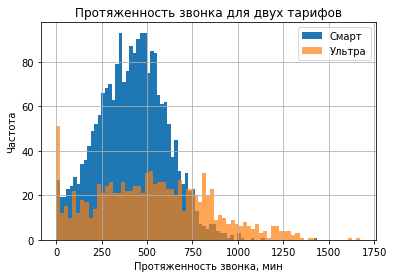

In [24]:
ax = filter_data[filter_data['tariff'] == "smart"]['duration'].plot(kind='hist',bins=75, label="Смарт")
filter_data[filter_data['tariff'] == "ultra"]['duration'].plot(
    ax=ax,
    kind='hist',
    bins=75, 
    grid=True,
    alpha = 0.7,
    label="Ультра"
)
plt.legend()
plt.title('Протяженность звонка для двух тарифов')
plt.xlabel('Протяженность звонка, мин')
plt.ylabel('Частота')
plt.show()

Из графикиа мы видим: 
* пользователи тарифа "ультра", чаще всего говорят меньше 1 минуты
* в среднем говорят 500 минут ~ чуть больше 8 часов в месяц
* после 800 минуты виден планый спад - "любителей живого общения" становится меньше

Для тарифа "смарт":
* пользователи реже говорит меньше одной минуты
* говорят в среднем 420 минут ~ 7 часов 
* планый спад на 500 минуте (включается сверхпакет)
* меньше клиентов говорящхи больше 800 минут по сравнению владельцев пакета "ультра"

Посмотрим теперь пользователей интернета:

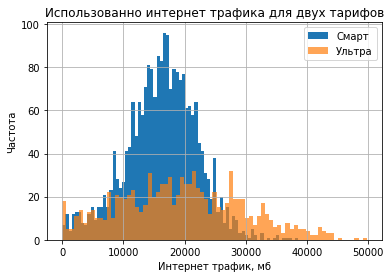

In [25]:
ax = filter_data[filter_data['tariff'] == "smart"]['mb_used'].plot(kind='hist',bins=75, label="Смарт")
filter_data[filter_data['tariff'] == "ultra"]['mb_used'].plot(
    ax=ax,
    kind='hist',
    bins=75, 
    grid=True,
    alpha = 0.7,
    label="Ультра",
)
plt.legend()
plt.title('Использованно интернет трафика для двух тарифов')
plt.xlabel('Интернет трафик, мб')
plt.ylabel('Частота')
plt.show()

По графику:
* пик для пользователей пакета "смарт" находится в районе сверхпакета (15360 мб), что означает: половина пользователей начинают доплачивает за дополнительный интернет
* для пользователей "ультра" пики находятся левее сверхпакета - они доплачивают реже за интернет
* в пакете "смарт" встречаются клиенты с трафиком больше 30000, хотя и меньше чем на "ультра", где только начинается спад

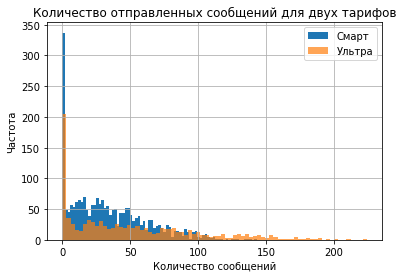

In [26]:
ax = filter_data[filter_data['tariff'] == "smart"]['messages'].plot(kind='hist',bins=75, label="Смарт")
filter_data[filter_data['tariff'] == "ultra"]['messages'].plot(
    ax=ax,
    kind='hist',
    bins=75, 
    grid=True,
    alpha = 0.7,
    label="Ультра"
)
plt.legend()
plt.title('Количество отправленных сообщений для двух тарифов')
plt.xlabel('Количество сообщений')
plt.ylabel('Частота')
plt.show()

По графику:
* клиенты двух тарифов, чаще всего, пренебрегают отправкой сообщений
* графики примерно схожи между собой, главное отличие в количестве сообщений после 110, для "смарт" таких клиентов практически нет, когда для "ультра" имеются клиенты после 150 сообщений
* сверх пакет для "смарт" начинается после 50 сообщений, клиенты это тарифа доплачивают в отличии от "ультра"

### Вывод 

После того как мы рассмотрели среднее, стандартное отклонение и дисперсию, построили гистограммы для тарифов по количеству звонков, сообщений и интернет трафику мы можем утверждать, что клиенты "смарт" намного чаще клиентов "ультра" переплачивают за тариф. Также мы узнали что клиенты двух тарифов стараются не пользоватся отправкой сообщений. По разнице частот, можно сделать вывод о преобраладние клиентов пользующийся тарифом "смарт" над "ультра".

## Проверка гипотез

В нашем исследовании расмотрим две гипотезы:
* средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются
* средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов

Начнём с первой, нулевой гипотезой для нас будет: *средняя выручка пользователей по двум тараифам равна между собой*, а значит альтернативной гипотезой будет: *средняя выручка пользователей по двум тарифам отличается и не равна между собой*. 

Для того чтобы отвергнуть или наоборот принять гипотезу, у нас имеется две генеральных совокупности. Мы можем сравнить их среднее с применением библиотеки `scipy` и её методов, через критерий Стьюдента. Для большей точности, мы возьмём уровень значимости равный 1%.

In [27]:
smart = users_trafic[users_trafic['tariff'] == 'smart']['profit']
ultra = users_trafic[users_trafic['tariff'] == 'ultra']['profit']
alpha = 0.01 # уровень значимости

result = st.ttest_ind(smart, ultra)

print('p - значение:', result.pvalue)
if result.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не отвергаем нулевую гипотезу')

p - значение: 1.394822320003296e-265
Отвергаем нулевую гипотезу


По полученным статистическим данным, мы может сказать что средняя выручка пользователей между тарифами не равна между собой. Вполне ожидаемый вывод, так как тарифы имеют разную месячную оплату и разные тариф за превышение лимита.

Рассмотрим вторую гипотезу: также составим нулевую и альтернативную:
* нулевой гипотезой у нас будет: *средняя выручка клиентов из Москвы равна выручке клиентов остальных городов*
* альтернативная гипотеза: *средняя вырчка клиентов из Москвы отличается от выручки остальных городов*

Также чтобы принять или отвергнуть гипотезу, мы сравним среднии двух генеральных совокупностей клиентов Москвы и остальных городов между собой, через критерий Стьюдента и примим уровень значимости 1%.

In [28]:
moscow_users = users_trafic[users_trafic['city'] == 'Москва']['profit']
other_users = users_trafic[users_trafic['city'] != 'Москва']['profit']
alpha = 0.01 # уровень значимости

result = st.ttest_ind(moscow_users, other_users)

print('p - значение:', result.pvalue.round(2))
if result.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не отвергаем нулевую гипотезу')

p - значение: 0.24
Не отвергаем нулевую гипотезу


На основе полученных данных, нулевая гипотеза не была отвергнута и мы можем сказать что жители столицы приносят такую же прибыль, как и пользователи других городов.

### Вывод

Наши гипотезы частично потвердились: для разных тарифов в действительности выручки отличаются друг от друга. Хоть и клиенты тарифа "смарт" зачастую превышают доступный пакет, они не равны выручкам тарифа "ультра". А для жителей Москвы выручка оказалась равна выручке остальных городов. Для дополнительного исследования можно будет узнать процент клиентов в каждом городе.

## Общий вывод

Ознакомившись с предоставленной выборкой, мы определили что клиенты «Мегалайн» подключающие тариф "смарт" чаще всего превышают пакет данных, особенно по пользованию интернета. При этом выручку которую приносят "смарт" и "ультра" не равны между с собой. Количество пользователей тоже не равны ( перевес идёт в сторону первого ).

Собрав выше сказанные факты, можем утверждать что тариф "смарт" для компании будет выгоднее, особенно если учесть анализ интернет пользования в наш технологичный век.

Также мы обратили внимание что выручка в месяц для жителей Москвы сопоставима выручке других городов. Для более глубокого исследования можно будет, разделить по городам, и посмотреть отдельно для каждого региона. Также можно будет посмотреть процент пользователей каждого города, для полноты картины.